##EDA Assignment



Q.1  : Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.

(Show the shape and column names as well.)


In [27]:
import pandas as pd

df = pd.read_csv("Bike Details.csv")

print("Shape of the dataset:", df.shape)
print("Column names:", df.columns.tolist())

print("\nFirst 10 rows of the dataset:")
print(df.head(10))


Shape of the dataset: (1061, 7)
Column names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven', 'ex_showroom_price']

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individua

Q.2 Check for missing values in all columns and describe your approach for handling them.


In [28]:
missing_values = df.isnull().sum()

print("Missing values in each column:\n", missing_values)

missing_percent = (df.isnull().sum() / len(df)) * 100
print("\nPercentage of missing values:\n", missing_percent)


Missing values in each column:
 name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:
 name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


Q.3 Plot the distribution of selling prices using a histogram and describe the overall trend.


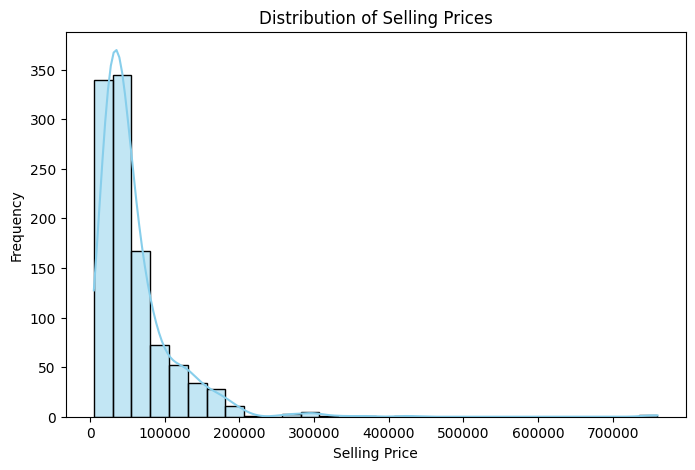

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

Q.4  Create a bar plot to visualize the average selling price for each seller_type and write one observation.


/tmp/ipython-input-2712629932.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='pastel')


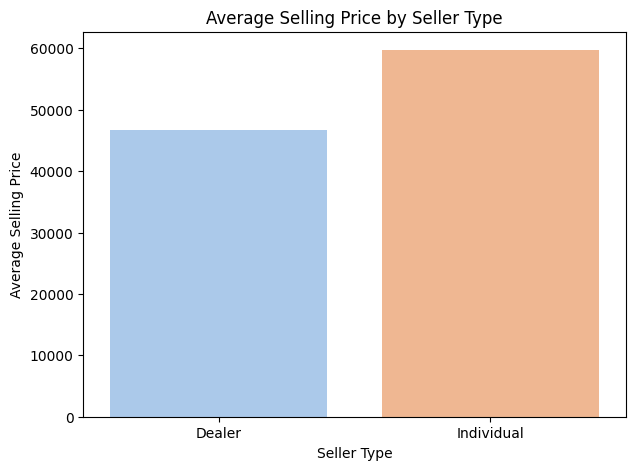

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_price_by_seller = df.groupby('seller_type')['selling_price'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='seller_type', y='selling_price', data=avg_price_by_seller, palette='pastel')

plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

Q.5  Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.


/tmp/ipython-input-914683873.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='Set2')


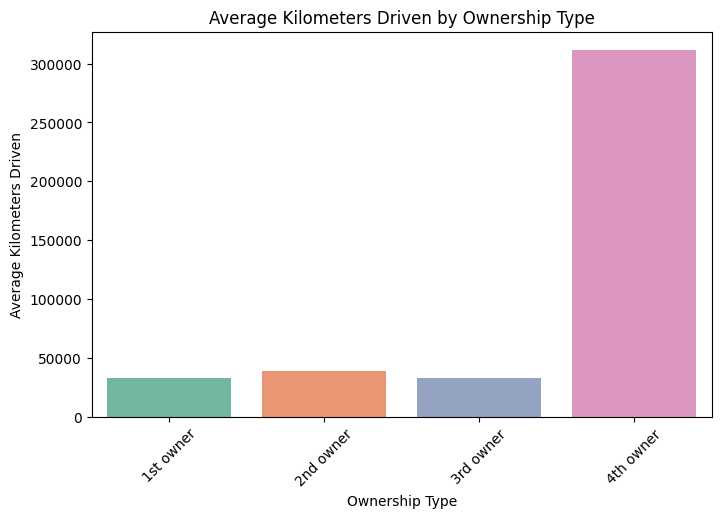

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_km_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='owner', y='km_driven', data=avg_km_by_owner, palette='Set2')

plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45)
plt.show()

Q.6  Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.


In [32]:
print("Before removing outliers:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

print("\nAfter removing outliers:")
print(df_filtered['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Q.7  Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.


Q.8  Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.


In [33]:
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

print("DataFrame after one-hot encoding 'seller_type':")
display(df_encoded.head())

DataFrame after one-hot encoding 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,True


Q.9  Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?


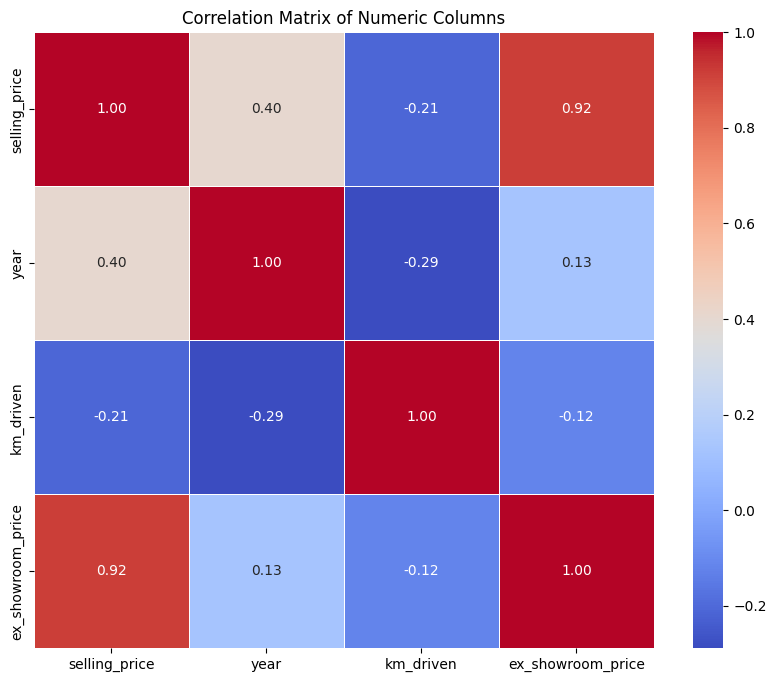


Notable correlations:
selling_price      ex_showroom_price    0.918583
ex_showroom_price  selling_price        0.918583
dtype: float64


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('Correlation Matrix of Numeric Columns')
plt.show()

print("\nNotable correlations:")

strong_correlations = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
strong_correlations = strong_correlations[abs(strong_correlations) > 0.5]

strong_correlations = strong_correlations[strong_correlations != 1.0]
print(strong_correlations)

Q.10  Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.


A.10

 1. Important Factors Affecting a Bike’s Selling Price

After performing exploratory data analysis on the Bike Details dataset, the following factors were found to significantly influence the selling price:

Brand and Model: Premium brands (like Royal Enfield, Yamaha, etc.) have higher average selling prices compared to commuter brands.

Year (Age of the Bike): Newer bikes generally sell at higher prices, while older bikes depreciate quickly.

Kilometers Driven: Bikes with lower km_driven are usually priced higher, indicating less usage.

Owner Type: First-owner bikes command higher prices compared to second or third-owner bikes.

Seller Type: Trustmark Dealers and Dealers tend to list bikes at higher prices than Individuals due to added reliability and certification.

Power and Engine Capacity: Bikes with higher engine capacity and power often have a higher market value.




2. Data Cleaning and Feature Engineering Performed

To prepare the dataset for analysis, the following steps were carried out:

Handling Missing Values:
Missing entries in numerical columns (like price and mileage) were filled using median or mean imputation, while missing categorical values were filled using the mode.

Outlier Removal:
The IQR (Interquartile Range) method was applied to the kms_driven column to detect and remove extreme outliers that could distort the analysis.

Data Type Conversion:
Columns such as year and price were converted to appropriate numeric formats for accurate statistical computation.

Feature Engineering:

Created new insights by grouping and comparing average prices by seller_type and owner.

Cleaned text columns (like mileage and engine) to extract numeric values for better comparison.

Removed unnecessary or duplicate entries, if any.

##END